In [89]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

In [90]:
import numpy as np
import scipy.stats as ss
import pandas as pd
from sklearn.linear_model import LinearRegression
import itertools
from collections import defaultdict
import operator
from os import path
import pickle
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [25, 13]
pd.options.display.width = 500
n_bins_default = 15

In [91]:
def load_cache(file_path):
    with open(path.expanduser(file_path), 'rb') as f:
        cache_dict = pickle.load(f)
        df = cache_dict['df']
        p = list(cache_dict['parameter_names'])
        return df, p

In [92]:
rename_dict = {
    'relative_localization_error_translation_mean': 'translation_error',
    'geometric_similarity_sensor_mean_of_translation_eigenvalues_ratio_all': 'tgs',
    'lidar_visibility_mean_visible_ranges_ratio': 'lvr',
    'waypoint_start_time': 'start_time',
}
p = [
    'laser_scan_max_range',
    'laser_scan_fov_deg',
    'beta',
    'linear_update',
    'slam_node',
]
fp = [
    'environment_name'
]
m = [
    'start_time',
    'translation_error',
    'tgs',
    'lvr',
]
df, params = load_cache("/home/enrico/ds/performance_modelling/output/slam_new_config/run_data_per_waypoint_cache.pkl")
df.rename(columns=rename_dict, inplace=True)
df['linear_update'] = df['linear_angular_update'].apply(lambda x: x[0])
df['beta'] = df['beta'].apply(lambda x: max(x))
df = df[p+fp+m]

for c in p:
    print("{:>30}".format(c), sorted(list(df[c].unique())))

          laser_scan_max_range [3.5, 8.0, 30.0]
            laser_scan_fov_deg [90, 180, 359]
                          beta [0.0, 2.0]
                 linear_update [0.2, 0.5]
                     slam_node ['gmapping', 'slam_toolbox']


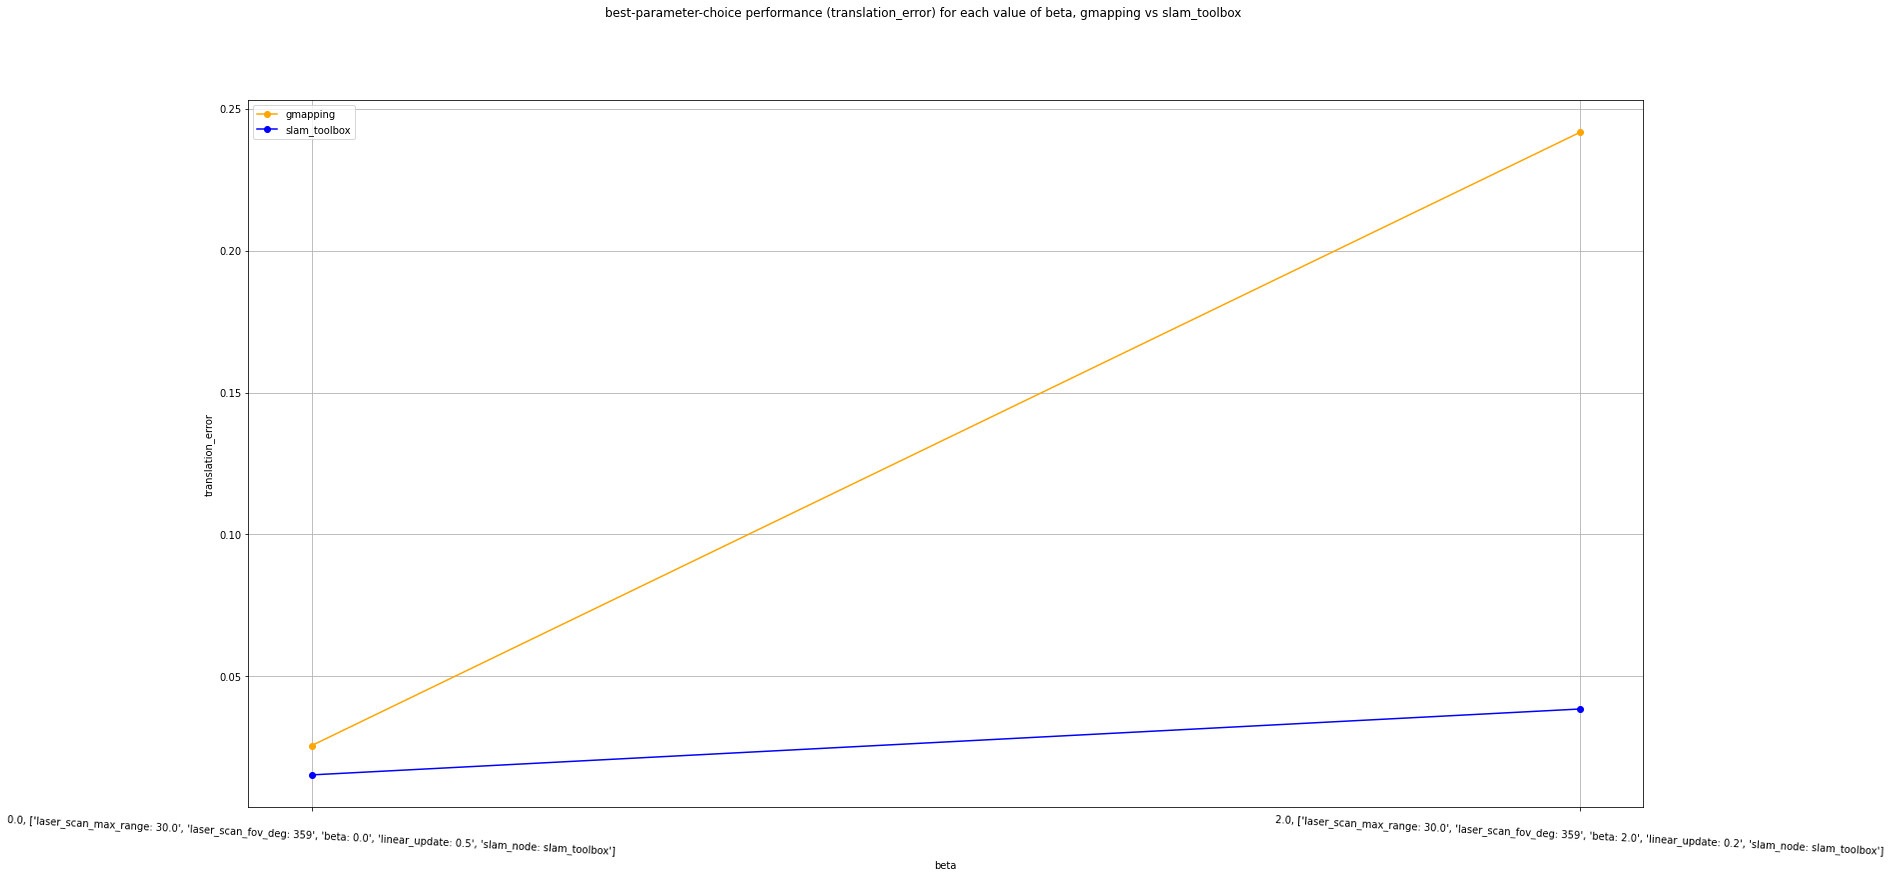

In [93]:
param = df.beta
performance_metric = df.translation_error

slam_node_values = sorted(list(df.slam_node.unique()))
param_values = sorted(list(param.unique()))

param_values_labels = list()
performance = defaultdict(list)
best_params = defaultdict(list)

for x in param_values:
    for slam_node in slam_node_values:
        df_ranked = df[(param == x) & (df.slam_node == slam_node)].groupby(p).translation_error.mean().sort_values()        
        performance[slam_node].append(df_ranked.iloc[0])
#         best_params[slam_node].append(df_ranked.index[0])
        best_params[slam_node].append(list(map(lambda n_v: "{}: {}".format(*n_v), zip(df_ranked.index.names, df_ranked.index[0]))))

for i, x in enumerate(param_values):
    best_node = None
    if -performance['gmapping'][i] > -performance['slam_toolbox'][i]:
        best_node = 'gmapping'
    else:
        best_node = 'slam_toolbox'
    param_values_labels.append(f"{x}, {str(best_params[best_node][i])}")
        
plt.plot(param_values, performance['gmapping'], label='gmapping', color='orange', marker='o')
plt.plot(param_values, performance['slam_toolbox'], label='slam_toolbox', color='blue', marker='o')
plt.xlabel(param.name)
plt.ylabel(performance_metric.name)

plt.xticks(param_values, param_values_labels, rotation=-3)
plt.legend()
plt.grid()
plt.suptitle(f"best-parameter-choice performance ({performance_metric.name}) for each value of {param.name}, gmapping vs slam_toolbox")
plt.show()

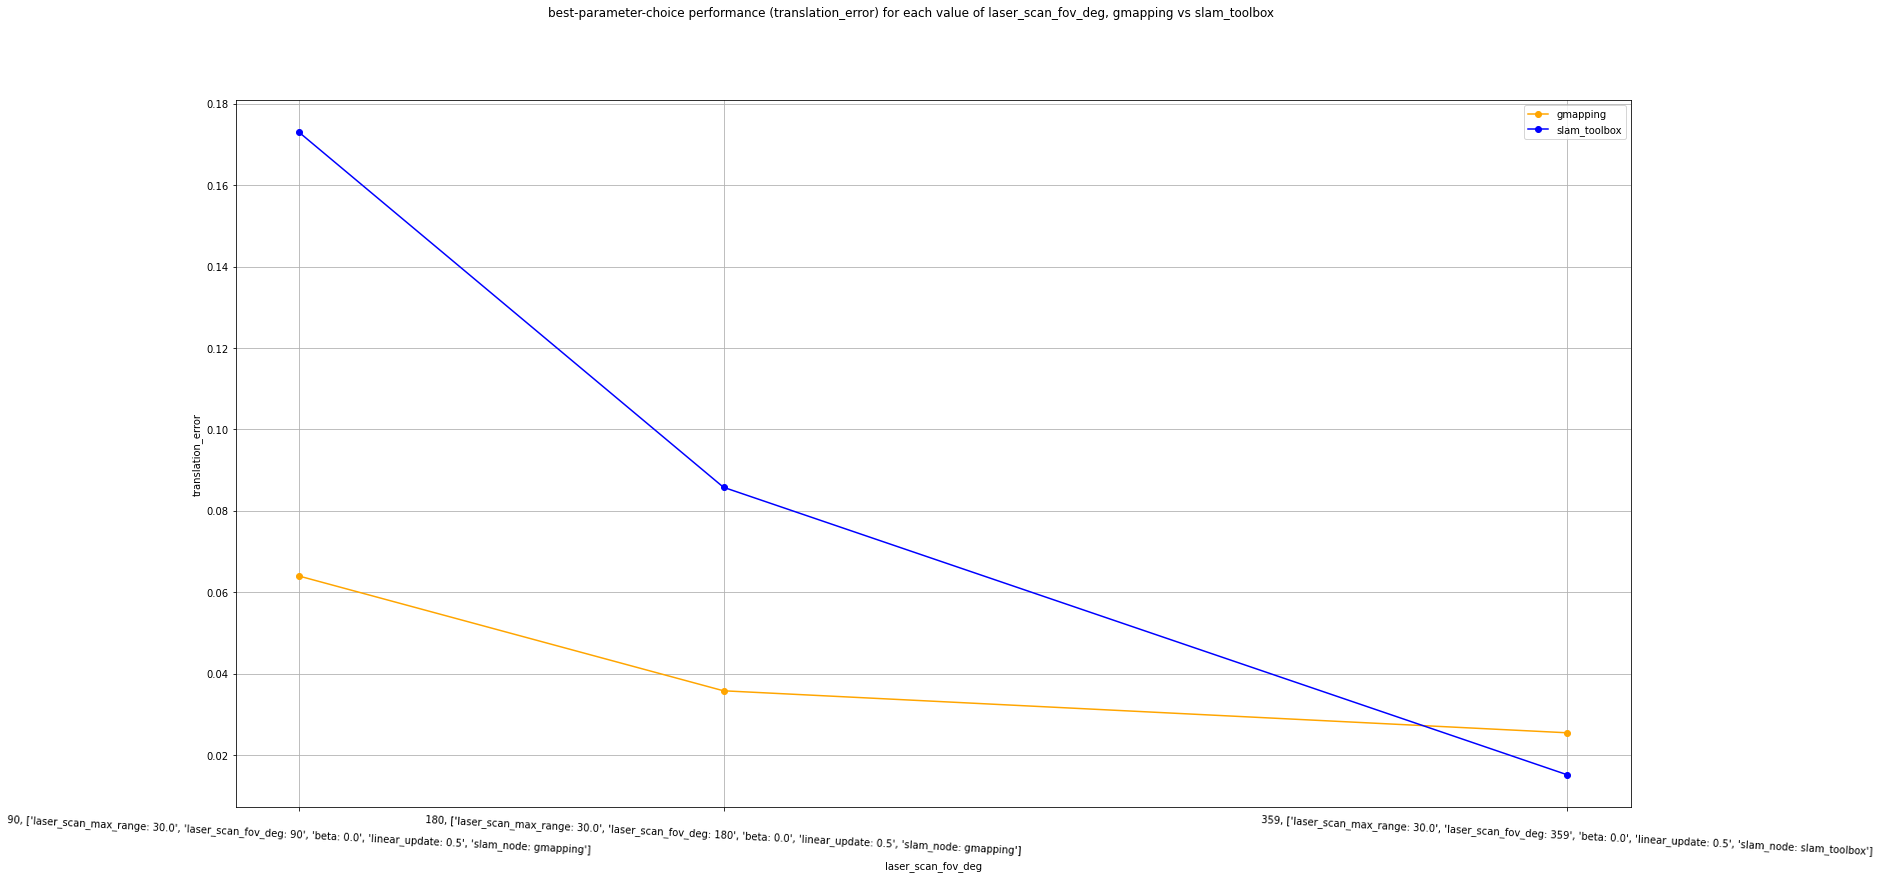

In [94]:
param = df.laser_scan_fov_deg
performance_metric = df.translation_error

slam_node_values = sorted(list(df.slam_node.unique()))
param_values = sorted(list(param.unique()))

param_values_labels = list()
performance = defaultdict(list)
best_params = defaultdict(list)

for x in param_values:
    for slam_node in slam_node_values:
        df_ranked = df[(param == x) & (df.slam_node == slam_node)].groupby(p).translation_error.mean().sort_values()        
        performance[slam_node].append(df_ranked.iloc[0])
        best_params[slam_node].append(list(map(lambda n_v: "{}: {}".format(*n_v), zip(df_ranked.index.names, df_ranked.index[0]))))

for i, x in enumerate(param_values):
    best_node = None
    if -performance['gmapping'][i] > -performance['slam_toolbox'][i]:
        best_node = 'gmapping'
    else:
        best_node = 'slam_toolbox'
    param_values_labels.append(f"{x}, {str(best_params[best_node][i])}")
        
plt.plot(param_values, performance['gmapping'], label='gmapping', color='orange', marker='o')
plt.plot(param_values, performance['slam_toolbox'], label='slam_toolbox', color='blue', marker='o')
plt.xlabel(param.name)
plt.ylabel(performance_metric.name)

plt.xticks(param_values, param_values_labels, rotation=-3)
plt.legend()
plt.grid()
plt.suptitle(f"best-parameter-choice performance ({performance_metric.name}) for each value of {param.name}, gmapping vs slam_toolbox")
plt.show()

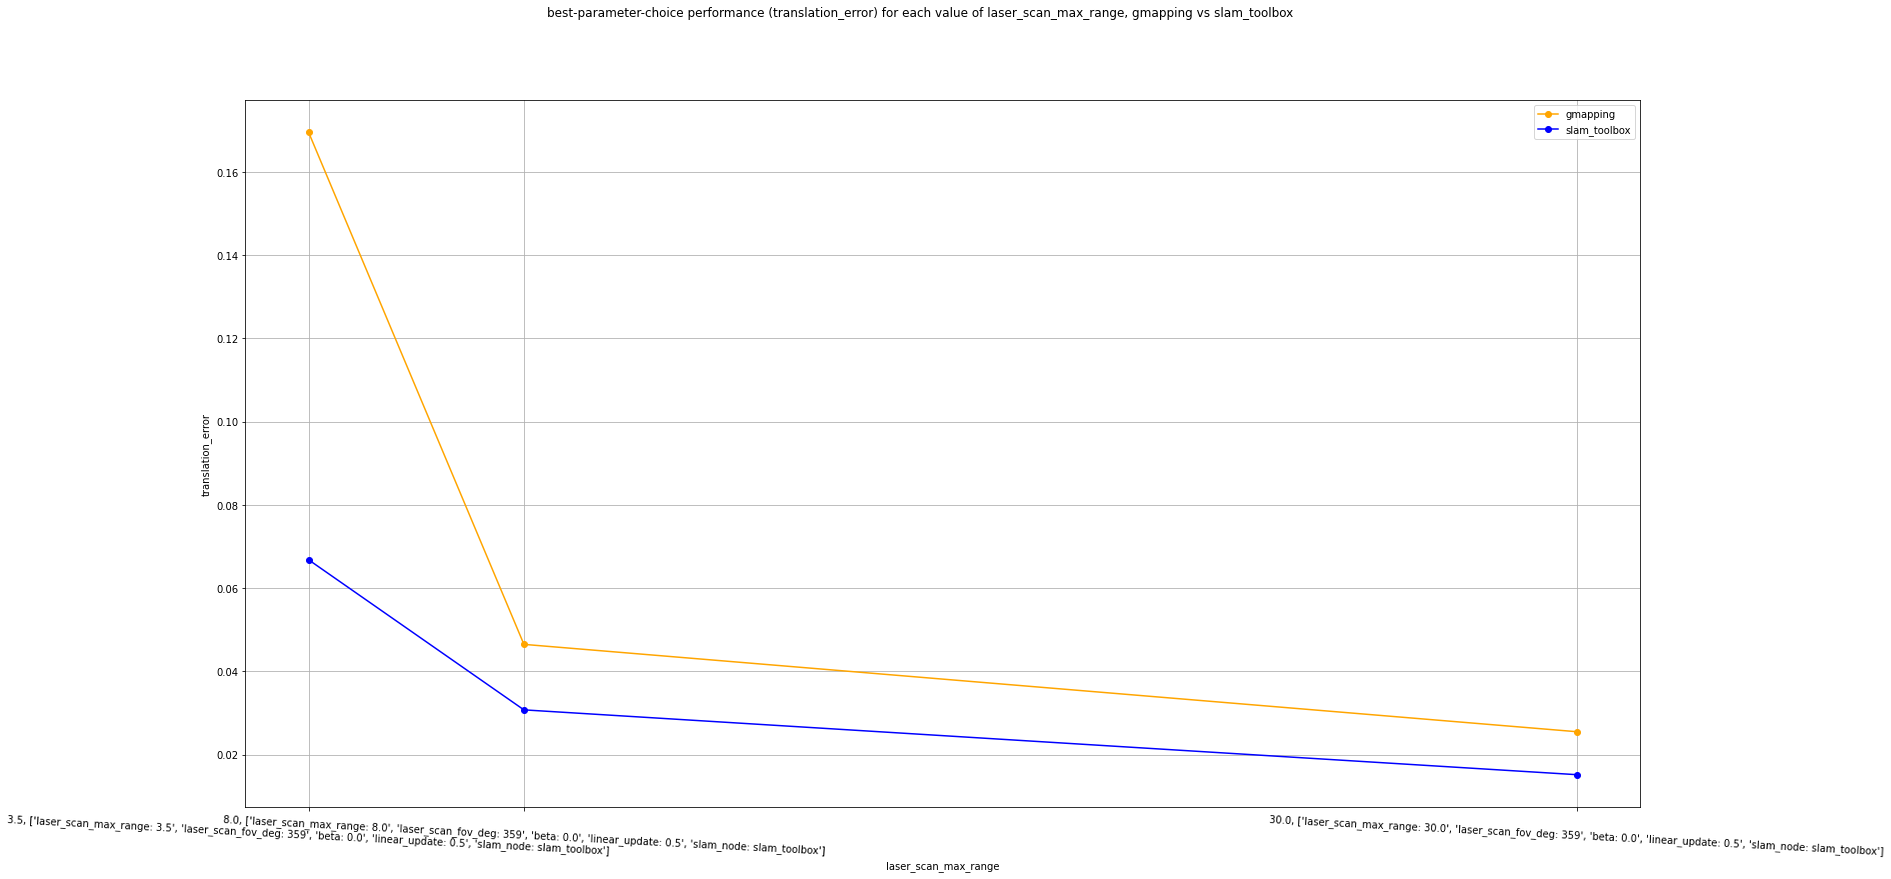

In [95]:
param = df.laser_scan_max_range
performance_metric = df.translation_error

slam_node_values = sorted(list(df.slam_node.unique()))
param_values = sorted(list(param.unique()))

param_values_labels = list()
performance = defaultdict(list)
best_params = defaultdict(list)

for x in param_values:
    for slam_node in slam_node_values:
        df_ranked = df[(param == x) & (df.slam_node == slam_node)].groupby(p).translation_error.mean().sort_values()        
        performance[slam_node].append(df_ranked.iloc[0])
        best_params[slam_node].append(list(map(lambda n_v: "{}: {}".format(*n_v), zip(df_ranked.index.names, df_ranked.index[0]))))

for i, x in enumerate(param_values):
    best_node = None
    if -performance['gmapping'][i] > -performance['slam_toolbox'][i]:
        best_node = 'gmapping'
    else:
        best_node = 'slam_toolbox'
    param_values_labels.append(f"{x}, {str(best_params[best_node][i])}")
        
plt.plot(param_values, performance['gmapping'], label='gmapping', color='orange', marker='o')
plt.plot(param_values, performance['slam_toolbox'], label='slam_toolbox', color='blue', marker='o')
plt.xlabel(param.name)
plt.ylabel(performance_metric.name)

plt.xticks(param_values, param_values_labels, rotation=-3)
plt.legend()
plt.grid()
plt.suptitle(f"best-parameter-choice performance ({performance_metric.name}) for each value of {param.name}, gmapping vs slam_toolbox")
plt.show()

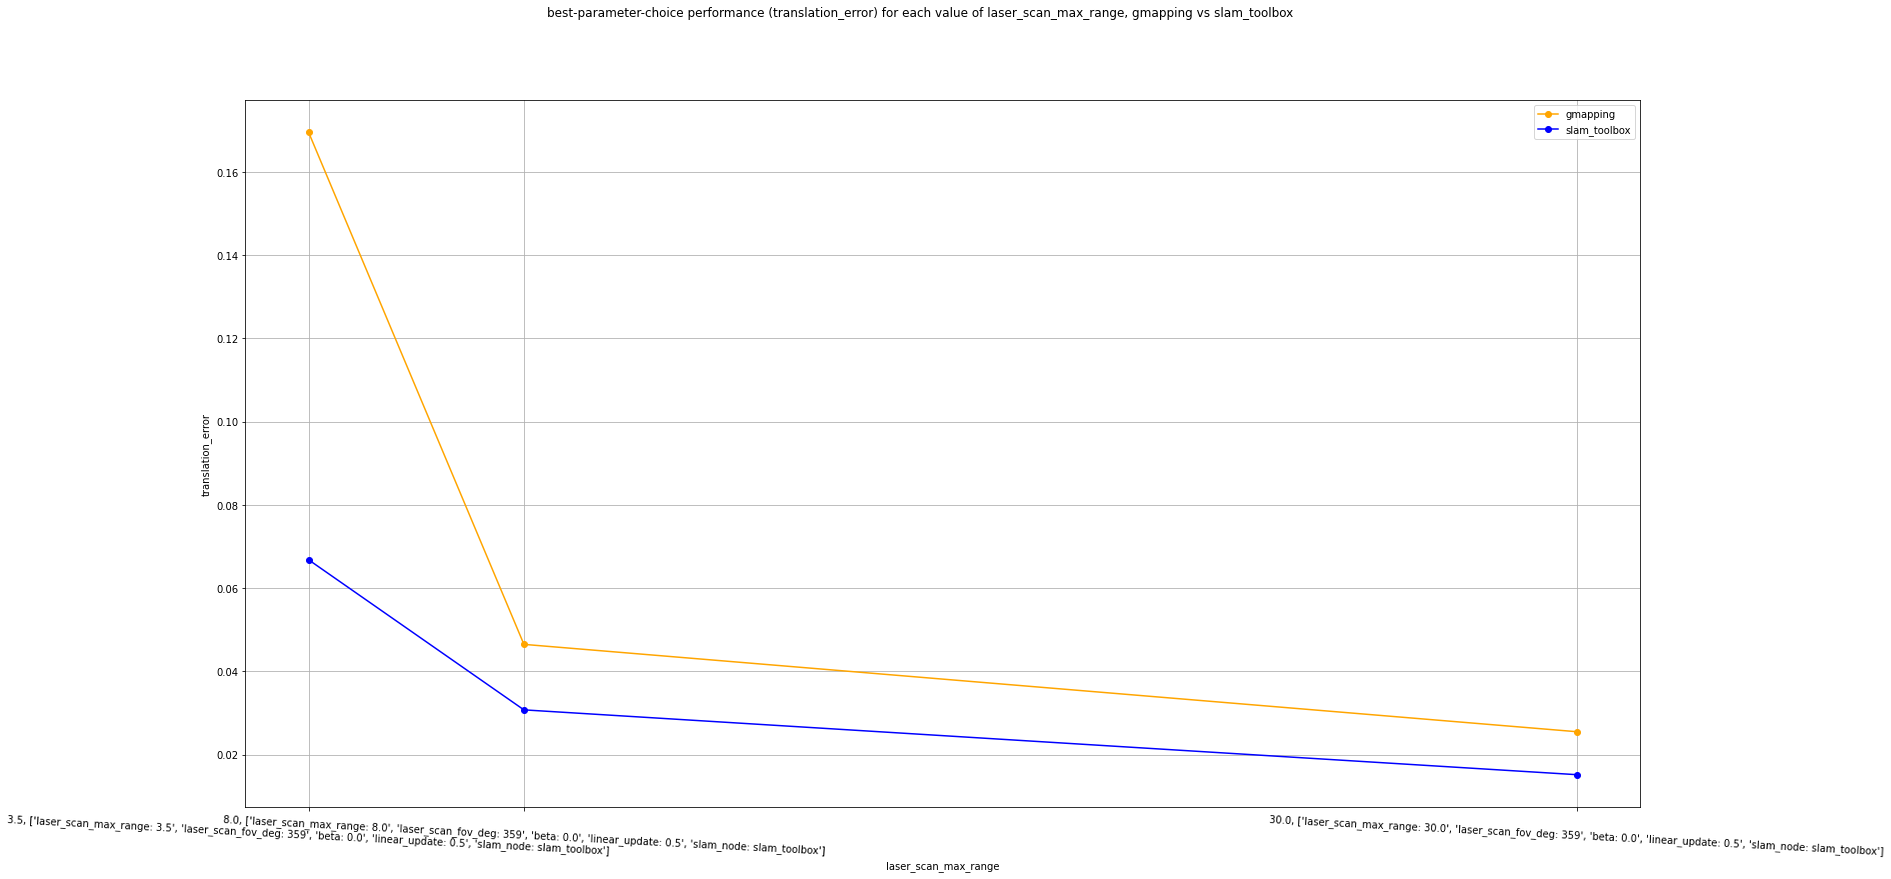

In [96]:
param = df.laser_scan_max_range
performance_metric = df.translation_error

slam_node_values = sorted(list(df.slam_node.unique()))
param_values = sorted(list(param.unique()))

param_values_labels = list()
performance = defaultdict(list)
best_params = defaultdict(list)

for x in param_values:
    for slam_node in slam_node_values:
        df_ranked = df[(param == x) & (df.slam_node == slam_node)].groupby(p).translation_error.mean().sort_values()        
        performance[slam_node].append(df_ranked.iloc[0])
        best_params[slam_node].append(list(map(lambda n_v: "{}: {}".format(*n_v), zip(df_ranked.index.names, df_ranked.index[0]))))

for i, x in enumerate(param_values):
    best_node = None
    if -performance['gmapping'][i] > -performance['slam_toolbox'][i]:
        best_node = 'gmapping'
    else:
        best_node = 'slam_toolbox'
    param_values_labels.append(f"{x}, {str(best_params[best_node][i])}")
        
plt.plot(param_values, performance['gmapping'], label='gmapping', color='orange', marker='o')
plt.plot(param_values, performance['slam_toolbox'], label='slam_toolbox', color='blue', marker='o')
plt.xlabel(param.name)
plt.ylabel(performance_metric.name)

plt.xticks(param_values, param_values_labels, rotation=-3)
plt.legend()
plt.grid()
plt.suptitle(f"best-parameter-choice performance ({performance_metric.name}) for each value of {param.name}, gmapping vs slam_toolbox")
plt.show()

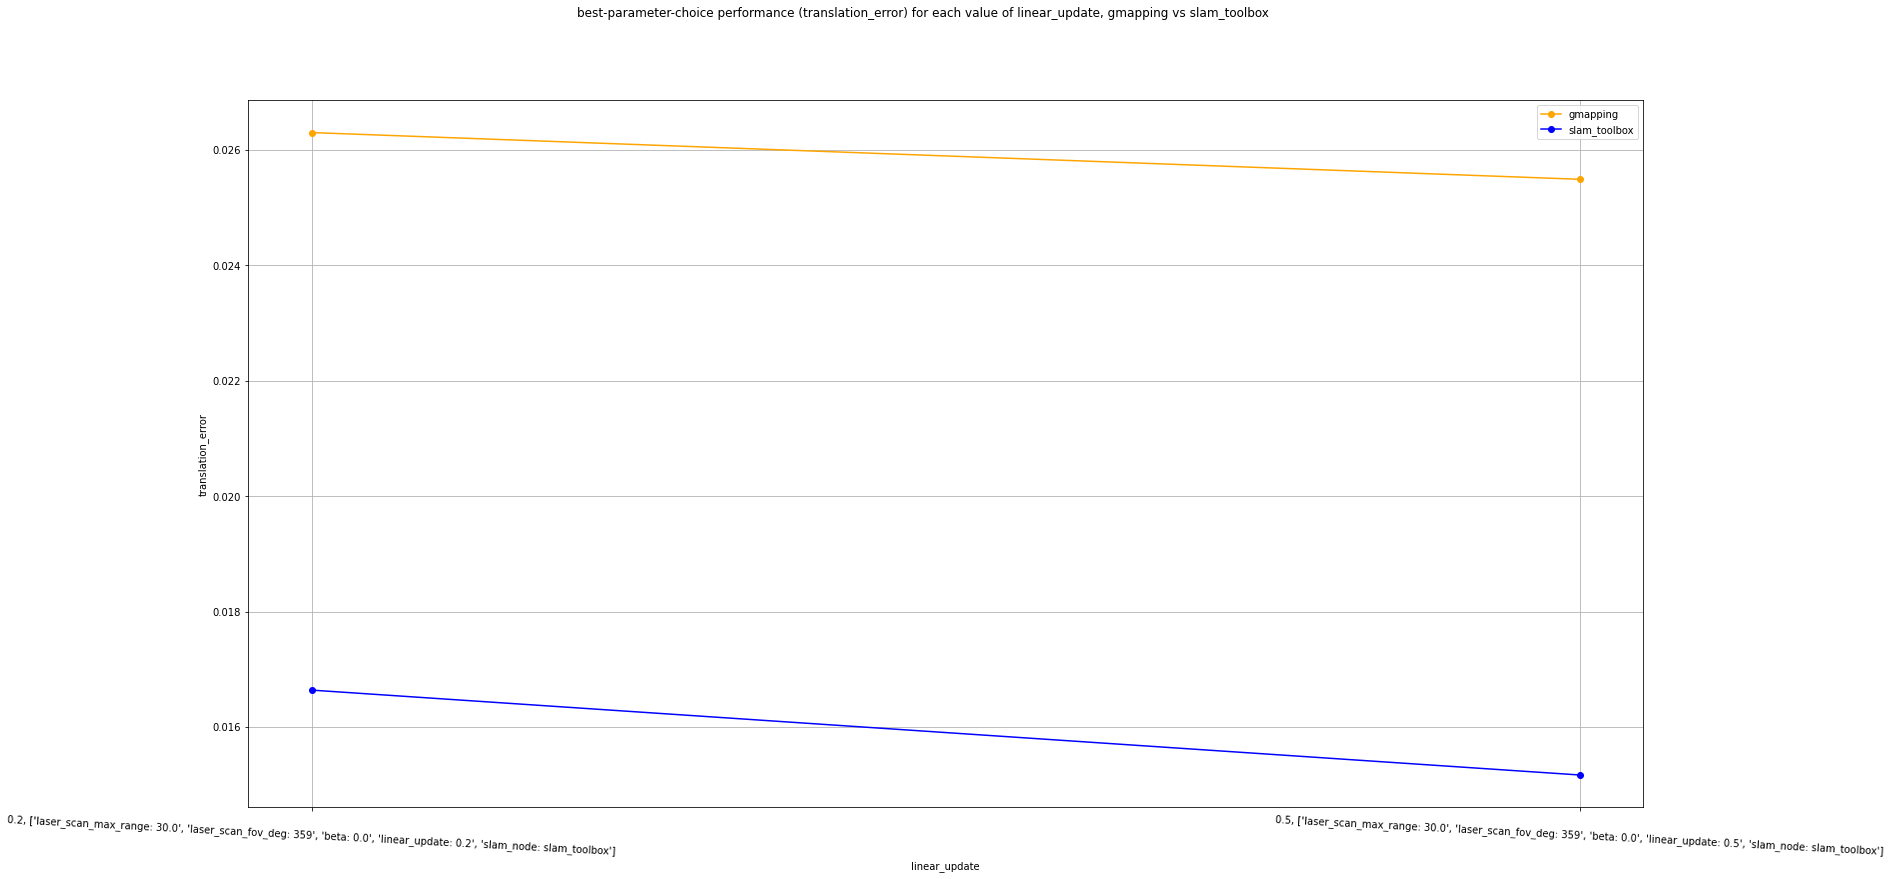

In [97]:
param = df.linear_update
performance_metric = df.translation_error

slam_node_values = sorted(list(df.slam_node.unique()))
param_values = sorted(list(param.unique()))

param_values_labels = list()
performance = defaultdict(list)
best_params = defaultdict(list)

for x in param_values:
    for slam_node in slam_node_values:
        df_ranked = df[(param == x) & (df.slam_node == slam_node)].groupby(p).translation_error.mean().sort_values()        
        performance[slam_node].append(df_ranked.iloc[0])
        best_params[slam_node].append(list(map(lambda n_v: "{}: {}".format(*n_v), zip(df_ranked.index.names, df_ranked.index[0]))))

for i, x in enumerate(param_values):
    best_node = None
    if -performance['gmapping'][i] > -performance['slam_toolbox'][i]:
        best_node = 'gmapping'
    else:
        best_node = 'slam_toolbox'
    param_values_labels.append(f"{x}, {str(best_params[best_node][i])}")
        
plt.plot(param_values, performance['gmapping'], label='gmapping', color='orange', marker='o')
plt.plot(param_values, performance['slam_toolbox'], label='slam_toolbox', color='blue', marker='o')
plt.xlabel(param.name)
plt.ylabel(performance_metric.name)

plt.xticks(param_values, param_values_labels, rotation=-3)
plt.legend()
plt.grid()
plt.suptitle(f"best-parameter-choice performance ({performance_metric.name}) for each value of {param.name}, gmapping vs slam_toolbox")
plt.show()